In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df=pd.read_csv("D:\\Datasets\\EcommerceCustomer.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


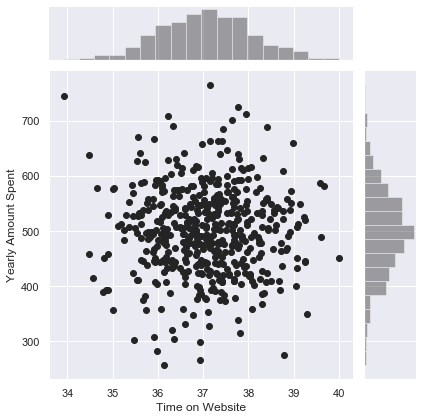

In [5]:
sns.set(color_codes=True,palette='binary_r')
sns.jointplot(df['Time on Website'],df['Yearly Amount Spent'])

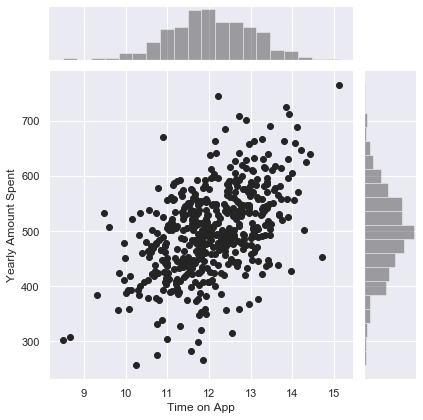

In [6]:
sns.jointplot(df['Time on App'],df['Yearly Amount Spent'])


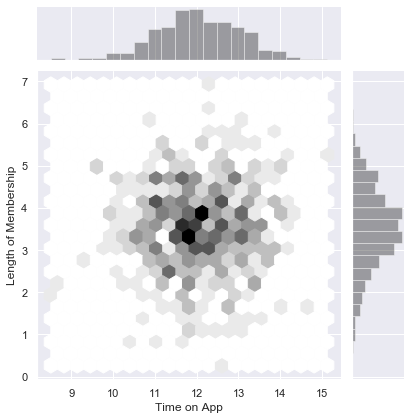

In [7]:
sns.jointplot(df['Time on App'],df['Length of Membership'],kind='hex')

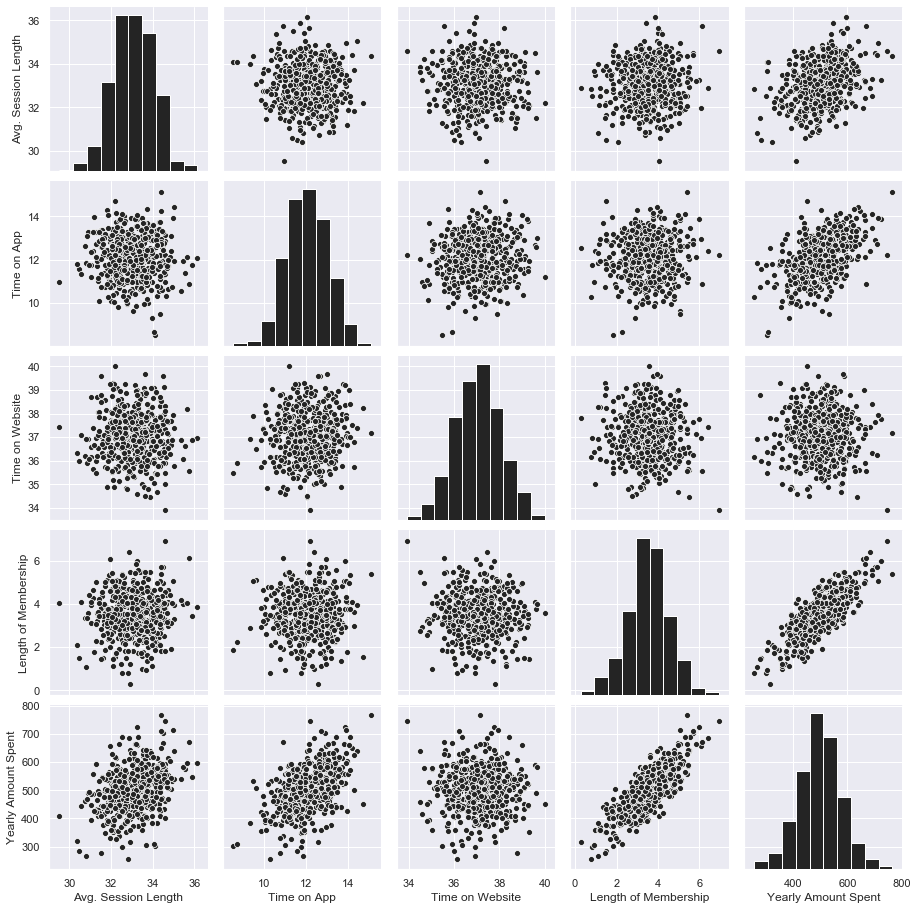

In [8]:
sns.pairplot(df)

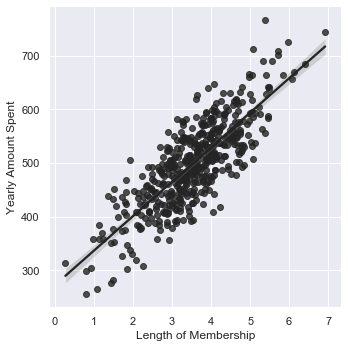

In [9]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

In [10]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


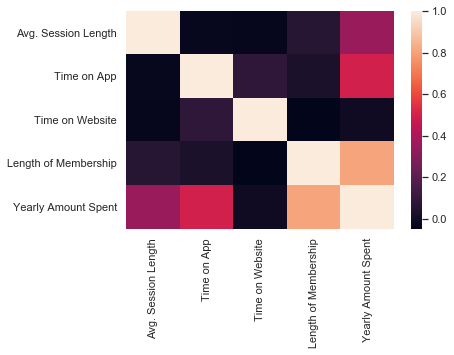

In [11]:
sns.heatmap(df.corr())

# Split the dataset in train and testing


In [12]:
x=df.iloc[:,3:7]
y=df.iloc[:,7:8]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lm.coef_

array([[25.98154972, 38.59015876,  0.19040527, 61.27909654]])

In [16]:
y_pred=lm.predict(x_test)

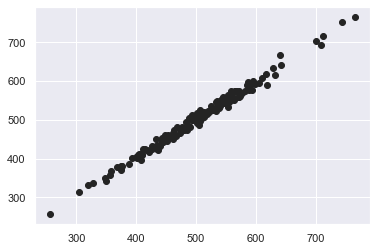

In [17]:
plt.scatter(y_test,y_pred)

In [18]:
from sklearn import metrics
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

MSE: 79.81305181284624
RMSE: 8.933815076038133
MAE: 7.228148667775297


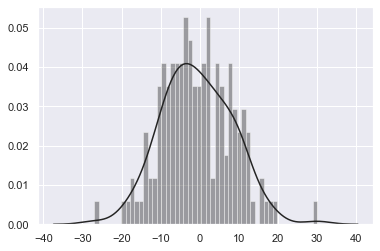

In [19]:
res_=y_test-y_pred
sns.distplot(res_,bins=50)

In [20]:
coef=pd.DataFrame((lm.coef_).T,x.columns,columns=['coefficient'])
coef

,coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpretation

If variable x1 (Avg. Session Length) increases with 1 unit y-variable (Yearly Amount Spent) increases by 25.9815 units

If variable x2 (Time on app) increases with 1 unit y-variable (Yearly Amount Spent) increases by 38.5901 units

If variable x3 (Time on Website) increases with 1 unit y-variable (Yearly Amount Spent) increases by 0.1904 units 

If variable x1 (Length of Membership) increases with 1 unit y-variable (Yearly Amount Spent) increases by 61.2790 units 

# Conclusion:

The company will be focus more on their mobile app than on their website.

because,variable X2 (Time on app) has more impact on Y-variable than variable X3(Time on website)

